In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
data = pd.read_csv('./Fraud.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
# For finding the pattern when "isFraud = 1"
data[data['isFraud'] == 1].head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [4]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<AxesSubplot:>

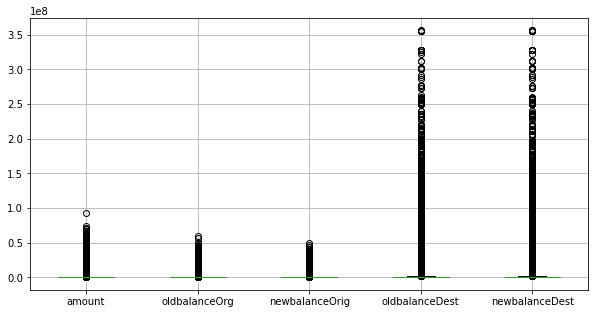

In [5]:
# to detect outliers
plt.figure(figsize = (10,5))
data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest']].boxplot()

In [6]:
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = np.percentile(col,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [7]:
for feature in data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest']]: 
    lr,ur = remove_outlier(data[feature])
    data[feature] = np.where(data[feature] > ur,ur,data[feature])
    data[feature] = np.where(data[feature] < lr,lr,data[feature])

<AxesSubplot:>

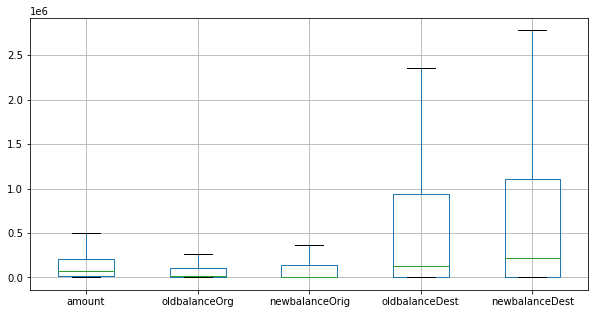

In [8]:
plt.figure(figsize = (10,5))
data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest']].boxplot()

<AxesSubplot:>

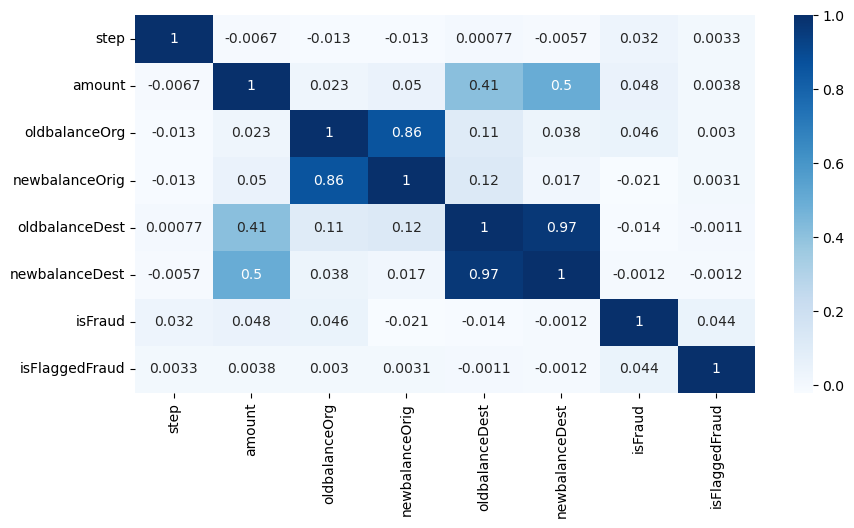

In [9]:
plt.figure(figsize = (10,5), dpi = 100)
sns.heatmap(data.corr(),cmap = "Blues",annot = True)

In [10]:
data = data.drop(['nameOrig','nameDest'],axis = 1)

In [11]:
label_encoder = preprocessing.LabelEncoder()

data['type']= label_encoder.fit_transform(data['type'])
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1,0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0,0


In [12]:
x, y = data.loc[:, data.columns != 'isFraud'], data['isFraud']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.40)

In [13]:
sc = StandardScaler()

x_train = sc.fit_transform(x_train)

x_test = sc.transform(x_test)

In [14]:
classifier = LogisticRegression()

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [15]:
print ("Accuracy : ", metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.9988676048546039
